<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import numpy as np
import gensim
import os
import re
import spacy

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
import string

In [2]:
path = '../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'
df = pd.read_csv(path)

In [3]:
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Electronics,Furniture              2
Home & Garden                      2
Name: primaryCategories, dtype: int64

In [4]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [5]:
reviews = pd.DataFrame(data = df, columns=['primaryCategories', 'reviews.text', 'reviews.rating'])

In [6]:
reviews['reviews.text'] = [re.sub('[^a-zA-Z 0-9]', '', x) for x in reviews['reviews.text']]

In [7]:
reviews.head()

,primaryCategories,reviews.text,reviews.rating
0,Health & Beauty,I order 3 of them and one of the item is bad q...,3
1,Health & Beauty,Bulk is always the less expensive way to go fo...,4
2,Health & Beauty,Well they are not Duracell but for the price i...,5
3,Health & Beauty,Seem to work as well as name brand batteries a...,5
4,Health & Beauty,These batteries are very long lasting the pric...,5


In [75]:
nlp = spacy.load('en_core_web_lg')

def tokenize(text):
    
    doc = nlp(text)
    
    STOP_WORDS = nlp.Defaults.stop_words.union(set(['be', 'a', 'good', 'this', 'the']))

    return [token.lemma_.strip().lower().translate(str.maketrans('', '', string.punctuation)) for token in doc
            if (token not in STOP_WORDS)
            and (token not in STOPWORDS)
            and (token.is_stop != True)
            and (token.is_punct != True) 
            and (token.like_num != True)
            and (token.is_currency != True)
            and (token.is_digit != True)
            and (token.is_space != True)]

In [76]:
def yield_tokens(docs):
    for doc in docs:
        tokens = tokenize(doc)
    yield tokens

In [77]:
token_stream = yield_tokens(reviews['reviews.text'])

In [78]:
id2word = corpora.Dictionary(yield_tokens(reviews['reviews.text']))

In [79]:
corpus = [id2word.doc2bow(text) for text in yield_tokens(reviews['reviews.text'])]

In [ ]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=33,
                   num_topics = 5,
                   passes=10,
                   workers=4
                  )

In [ ]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]

In [ ]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

In [ ]:
topics

TypeError: cannot perform reduce with flexible type

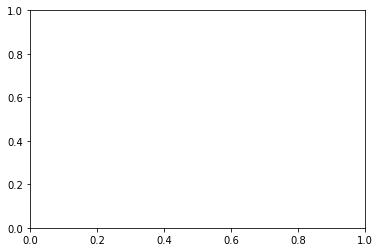

In [101]:
import seaborn as sns

sns.boxplot(topics)

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
4     -0.007540  0.0       1        1  96.666656
8      0.000640 -0.0       2        1   0.370372
5      0.000793 -0.0       3        1   0.370372
0      0.000714  0.0       4        1   0.370372
9      0.000899  0.0       5        1   0.370372
7      0.000899  0.0       6        1   0.370372
6      0.000899 -0.0       7        1   0.370372
3      0.000899 -0.0       8        1   0.370372
2      0.000899  0.0       9        1   0.370372
1      0.000899  0.0      10        1   0.370372, topic_info=        Term      Freq     Total Category  logprob  loglift
9       good  2.000000  2.000000  Default  24.0000  24.0000
6     dollar  1.000000  1.000000  Default  23.0000  23.0000
1   browsing  1.000000  1.000000  Default  22.0000  22.0000
4    certain  1.000000  1.000000  Default  21.0000  21.0000
22     watch  1.000000  1.000000  Default  20.0000  20.0000
..       ...       ...       ...      ...      ...      ...
22     watch  0.004012  1.009701  Topic10  -3.1781   0.0704
4    certain  0.004012  1.009713  Topic10  -3.1781   0.0704
1   browsing  0.004012  1.009729  Topic10  -3.1781   0.0704
6     dollar  0.004012  1.009821  Topic10  -3.1781   0.0703
9       good  0.004012  2.779544  Topic10  -3.1781  -0.9422

[264 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         1  0.990515             bit
1         1  0.990365        browsing
2         1  0.990435          budget
3         1  0.990526          camera
4         1  0.990381         certain
5         1  0.990676          device
6         1  0.990275          dollar
7         1  0.990403  expectionation
8         1  0.990616          freeze
9         1  1.079314            good
10        1  0.990571         lacking
11        1  0.990669             lag
12        1  0.990524           light
13        1  0.990454            like
14        1  0.990620             low
15        1  0.990440         overall
16        1  0.990508       recommend
17        1  0.990591           table
18        1  0.990615          tablet
19        1  0.990481            time
20        1  0.990538             use
21        1  0.990465           video
22        1  0.990392           watch
23        1  0.990580             web, R=24, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 6, 1, 10, 8, 7, 4, 3, 2])

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling

In [85]:
from IPython.display import Audio
sound_file = './sounds/Ding-sound-effect.mp3'

In [86]:
Audio(sound_file, autoplay=True)